# Action of Ising Defects

The defects we calculate must commute with the Ising generators. These are introduced as other defects of the form $L\otimes 1$ and $1\otimes L$ so let's figure out how these act on the twisted modules by the exchange defect $S$. 

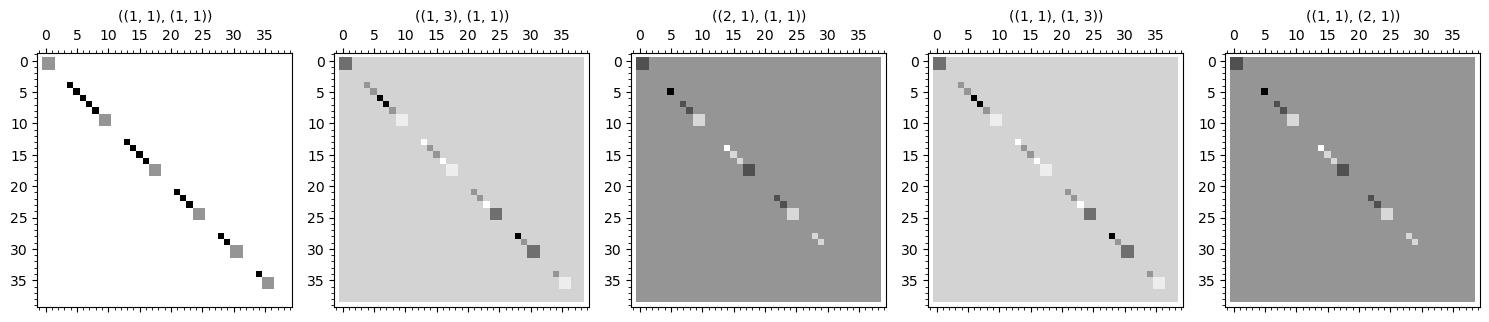

In [1]:
# from sage import *
import cftpy as cft
from cftpy import showvs

# Define some details about the CFT we are interested in
tri = {
    'model' : 'folded_tricritical_ising',
    'K'     : QQbar,
}

# The generators of the copy of ising in Tricritical Ising have Kac labels
ising_defect_labels     = [(1,1), (1,3), (2,1)]
folded_defect_labels    = [(a,(1,1)) for a in ising_defect_labels] + [((1,1),a) for a in ising_defect_labels]
folded_defects          = {l:cft.verlinde_line(l,**tri) for l in folded_defect_labels}

# The change of basis matrix for the VOA invariant under the exchange defect
cob                     = cft.exchange_orbifold_change_of_basis_matrix(p=5,q=4)
folded_defects_exchange = {l:cob * folded_defects[l] * cob.T for l in folded_defects}

# Here is a plot of how they act in the Vir^2 primaries
graphics_array([folded_defects_exchange[l].numerical_approx().apply_map(real).plot(title=l) for l in folded_defects_exchange]).show(figsize=15)

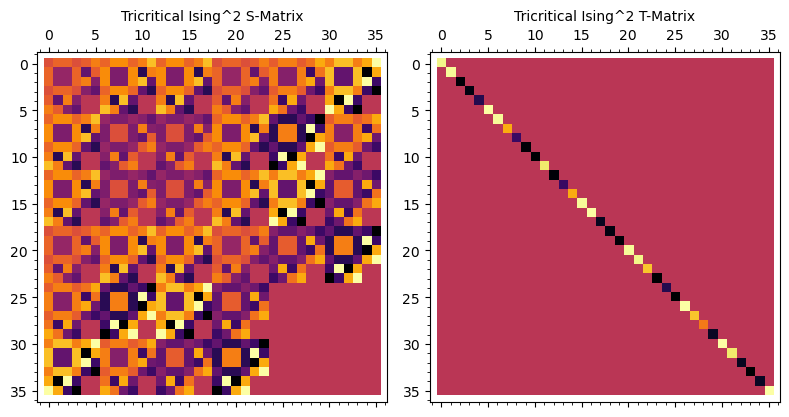

In [2]:
# Now we will get their S-transform
S, labels   = cft.S_matrix(**tri)
T, _        = cft.T_matrix(**tri)
graphics_array([
    S.numerical_approx().apply_map(real).plot(cmap='inferno', title="Tricritical Ising^2 S-Matrix"),
    T.numerical_approx().apply_map(real).plot(cmap='inferno', title="Tricritical Ising^2 T-Matrix")]).show(figsize=8)

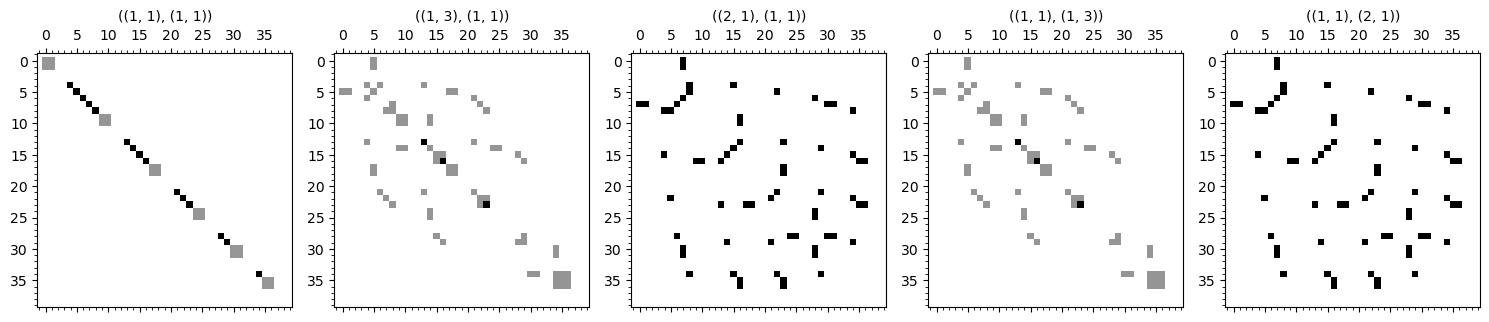

In [7]:
chop = lambda e=1e-10: lambda x: (x if abs(x) > e else 0)

# Orbifold S-matrix
So  = cft.S_matrix(model="exchange_tricritical_ising",K=CC).apply_map(real)

# Now we calculate the twisted spaces by S transforming
twisted_spaces = {l: So*folded_defects_exchange[l]*So for l in folded_defects_exchange}

graphics_array([twisted_spaces[l].numerical_approx().apply_map(real).plot(title=l) for l in twisted_spaces]).show(figsize=15)